In [6]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
import pandas
from sklearn import metrics
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering as hac



df = pandas.read_csv('beer.csv', delimiter=',', index_col=[0,1])
df= df.sample(n=10000) #se toma una muestra para evitar problemas de memoria
X = df.values.tolist()
y = list(df.index.values)


brew=[x[0] for x in y] #lista de cervecerias como indice
beer=[x[1] for x in y] #lista de tipo de cervezas como indice
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) #reduccion dimensional
            
            

En primer lugar se estimara la cantidad de clusters que hay utilizando el coeficiente Silhouette.

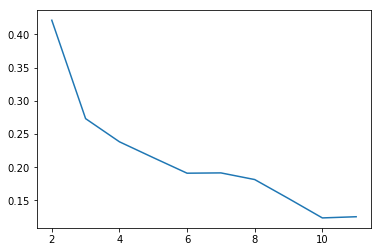

In [7]:
a=10 #numero de iteraciones
sil=[0]*a #lista de f
for i in range(2,a+2):
	clustering = hac(linkage="ward", n_clusters=i, affinity="euclidean")
	clustering.fit(X)
	sil[i-2]=metrics.silhouette_score(X, clustering.labels_, metric='euclidean')

plt.plot(range(2,a+2), sil)
plt.show()

Se observa que con K=2 Silhouette se maximiza, por lo tante se ocupara como cantidad de clusters.

-0.000147312828281
0.0480650538195
0.00503702264404
0.458653764722
0.00996461202864
24.6958163713


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


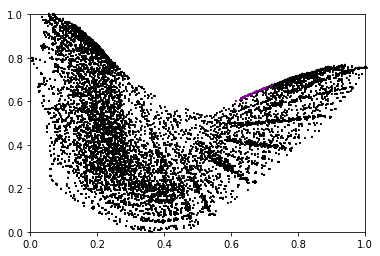

In [8]:

clustering = hac(linkage="complete", n_clusters=2, affinity="euclidean")
clustering.fit(X)

print(metrics.adjusted_rand_score(brew, clustering.labels_)) # test w shifted y random
print(metrics.normalized_mutual_info_score(brew, clustering.labels_))
print(metrics.homogeneity_score(brew, clustering.labels_))
print(metrics.completeness_score(brew, clustering.labels_))
print(metrics.v_measure_score(brew, clustering.labels_))
print(metrics.fowlkes_mallows_score(brew, clustering.labels_))

x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)

for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], '.',
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 10})

plt.show()
	

0.000644488191629
0.10144630689
0.0323330703114
0.318291862865
0.0587029170363
44.4973606134


C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


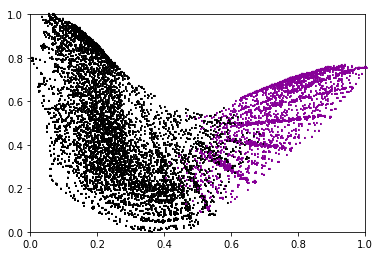

In [10]:

clustering = hac(linkage="ward", n_clusters=2, affinity="euclidean")
clustering.fit(X)
x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)

print(metrics.adjusted_rand_score(brew, clustering.labels_)) # test w shifted y random
print(metrics.normalized_mutual_info_score(brew, clustering.labels_))
print(metrics.homogeneity_score(brew, clustering.labels_))
print(metrics.completeness_score(brew, clustering.labels_))
print(metrics.v_measure_score(brew, clustering.labels_))
print(metrics.fowlkes_mallows_score(brew, clustering.labels_))



for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], '.',
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 10})



plt.show()
	

